# Chapter 1
The exercises are available here http://www.gatsby.ucl.ac.uk/~dayan/book/exercises/c1/c1.pdf.

In [10]:
from elephant.spike_train_generation import homogeneous_poisson_process
from quantities import Hz, s, ms
import matplotlib.pyplot as plt
import numpy as np

# One

/home/maria/anaconda3/lib/python3.6/site-packages/quantities/quantity.py:321: RuntimeWarning: divide by zero encountered in true_divide
  return np.true_divide(other, self)


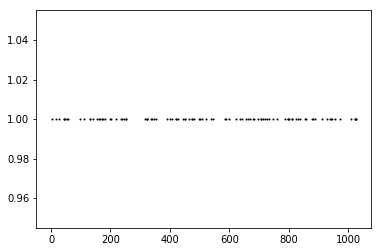

In [12]:
spiketrain=homogeneous_poisson_process(rate=100.0*Hz, t_start=0.0*s, t_stop=10.0*s)
t = spiketrain.rescale(ms)
plt.plot(t[0:100], np.ones_like(t)[0:100], 'k.', markersize=2)

(array([499., 266., 118.,  44.,  32.,  19.,   8.,   0.,   2.,   1.]),
 array([1.93782341e-05, 7.34175373e-03, 1.46641292e-02, 2.19865047e-02,
        2.93088802e-02, 3.66312557e-02, 4.39536312e-02, 5.12760067e-02,
        5.85983822e-02, 6.59207577e-02, 7.32431332e-02]),
 <a list of 10 Patch objects>)

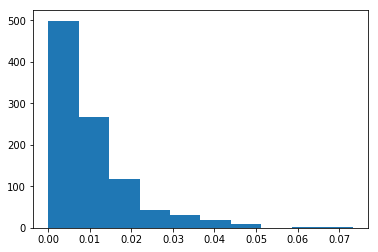

In [16]:
#print(spiketrain)
isi=[]
for spike_ind in range(0,len(spiketrain)-1):
    isi.append(spiketrain[spike_ind+1]-spiketrain[spike_ind])
plt.hist(isi)